In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.impute import SimpleImputer


import env
from wrangle3 import wrangled_zillow

In [2]:
train, validate, test = wrangled_zillow()
train.head()

Using cached csv


,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,county,transaction_date,latitude,longitude,...,prop_land_id,zip_code,bed_and_bath,year_built_binned,tax_value_binned,county_OC,county_VC,tax_value_encoded,pw_build,pw_build_encoded
48821,3.0,2.0,1625.0,297421.0,1944.0,3635.96,LA,2017-08-31,33.861841,-118.137146,...,261.0,96212.0,5.0,1940,Med,0,0,1,False,0
25004,3.0,2.0,2621.0,381698.0,2005.0,4672.06,VC,2017-05-17,34.213937,-119.168599,...,261.0,97101.0,5.0,2000,Med,0,1,1,True,1
42290,4.0,3.0,1884.0,435124.0,1950.0,5527.23,LA,2017-07-31,33.910458,-118.084166,...,261.0,96193.0,7.0,1950,Med,0,0,1,True,1
6767,4.0,2.0,1950.0,141182.0,1967.0,1424.50,OC,2017-02-15,33.508624,-117.663664,...,261.0,96985.0,6.0,1960,Low,1,0,0,True,1
46997,2.0,1.0,1108.0,249699.0,1929.0,3227.78,LA,2017-08-23,33.944921,-118.266853,...,261.0,95984.0,3.0,1920,Low,0,0,0,False,0


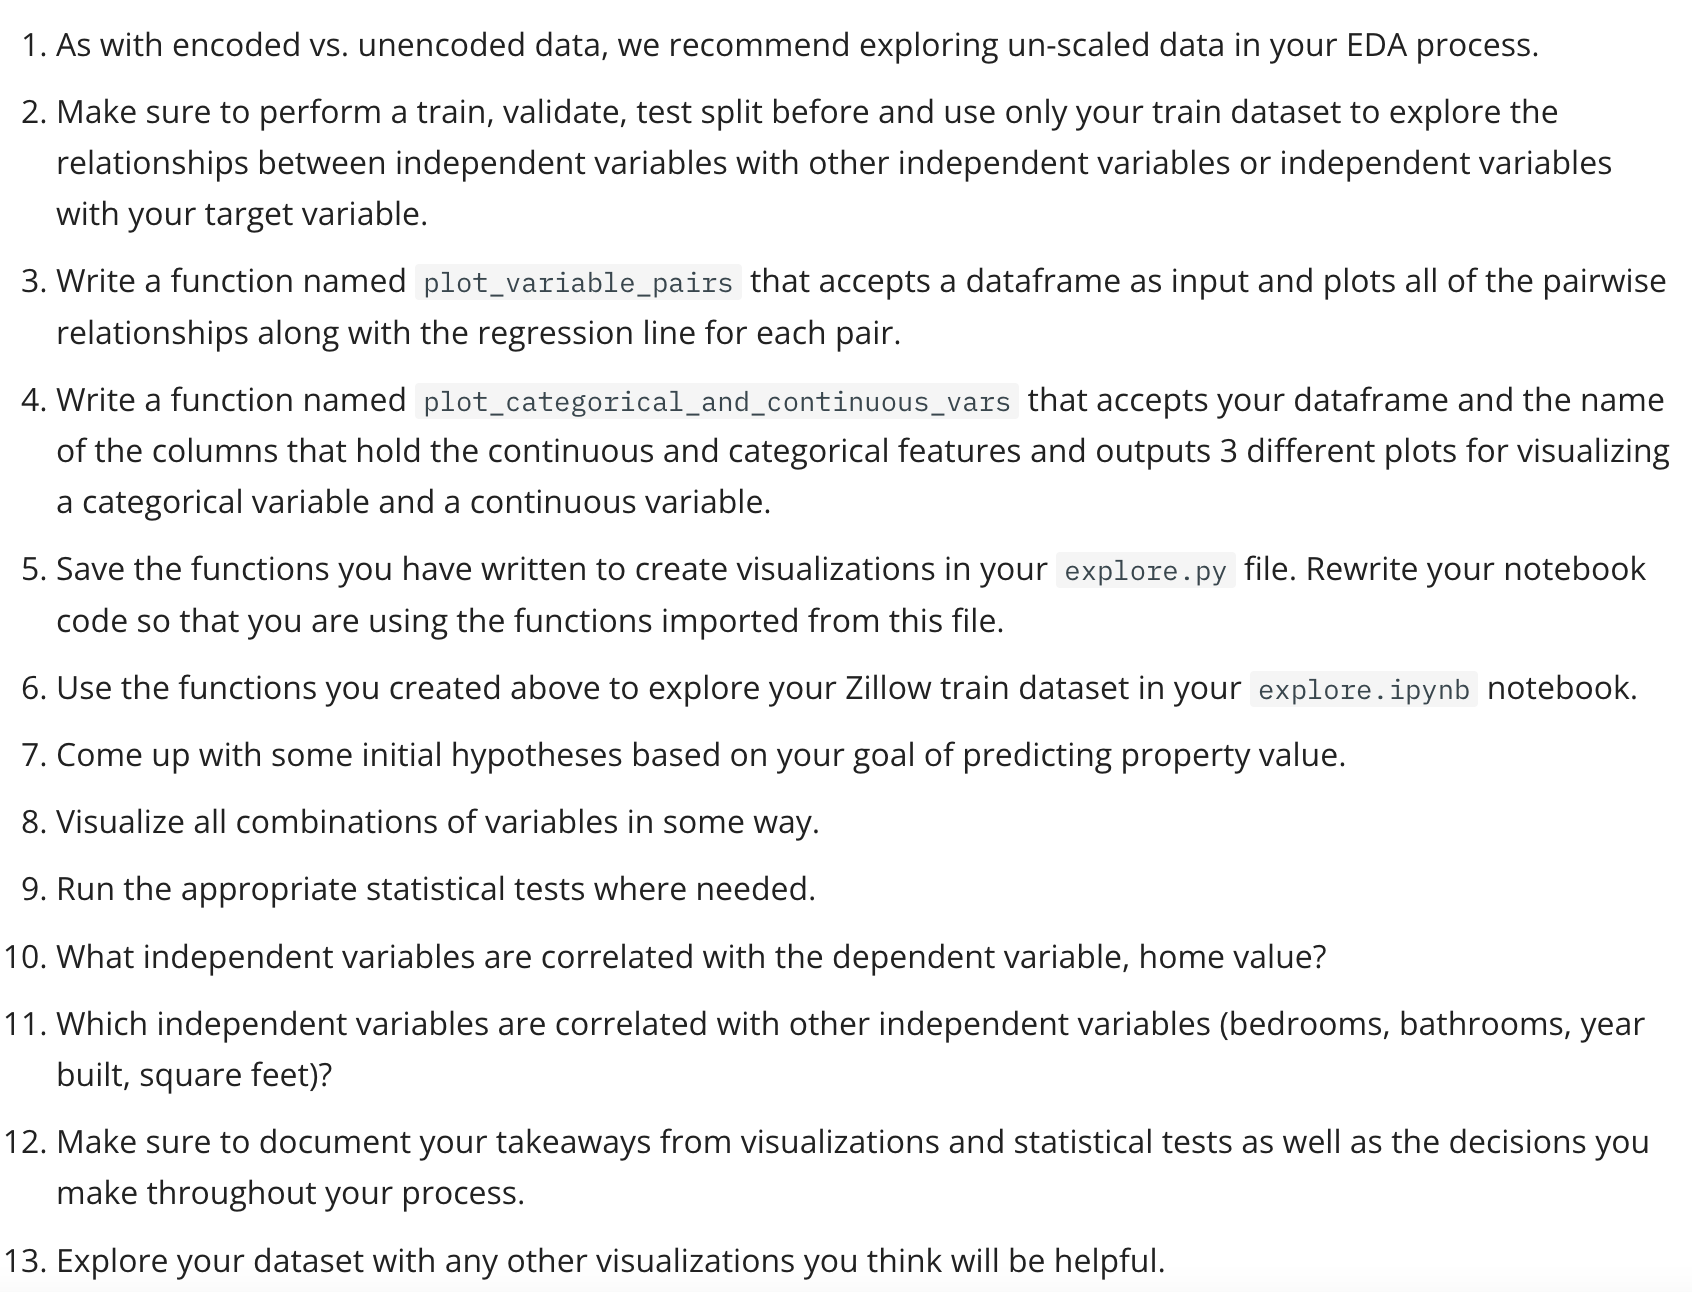

In [3]:
from IPython.display import Image
from IPython.display import HTML
#since its local, use path
PATH = "/Users/juleszara/codeup-data-science/regression-excercises/"
Image(filename = PATH + "zillow_explore_exercises.png") 

## Univariate Distributions

#### Continuous Variable Distribution

- df.[col].hist(grid=False, bins=10)
- sns.displot(x, data)
- sns.boxplot(data)

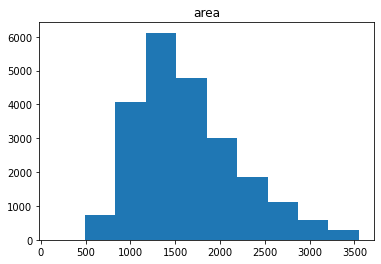

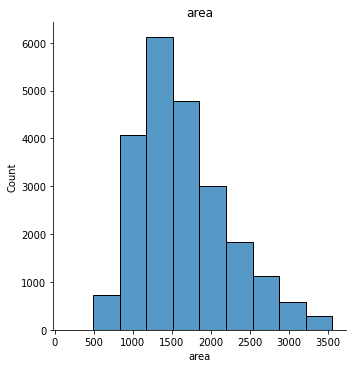

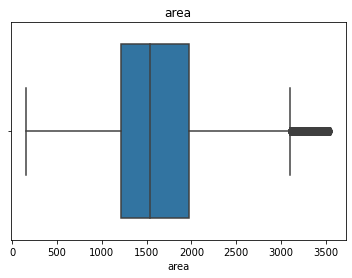

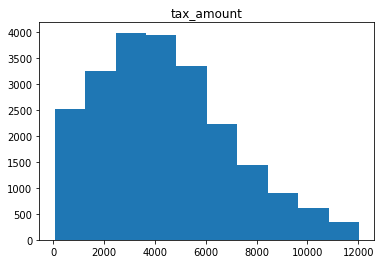

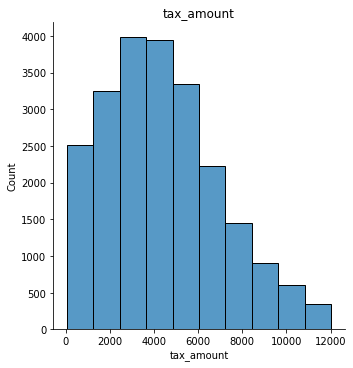

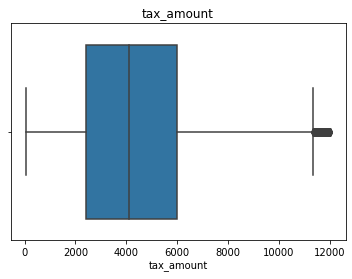

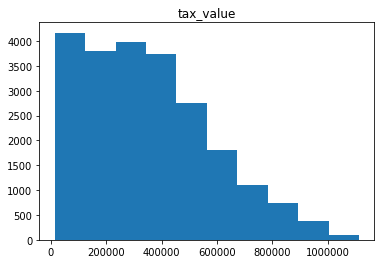

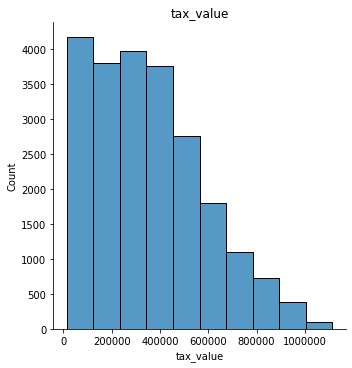

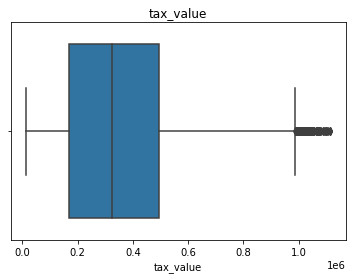

In [8]:
#plot continuous variables
num_cols = ['area', 'tax_amount', 'tax_value']

for col in num_cols:
    plt.hist(train[col])
    plt.ticklabel_format(useOffset = False, style = 'plain') #remove scientific notation
    plt.title(col)
    plt.show()
    sns.displot(x = train[col], data = train, bins = 10)
    plt.ticklabel_format(useOffset = False, style = 'plain')
    plt.title(col)
    plt.show()
    sns.boxplot(x = train[col])
    plt.title(col)
    plt.show()

#### Discrete Variable Distributions
- sns.countplot(x='discrete_var', data)

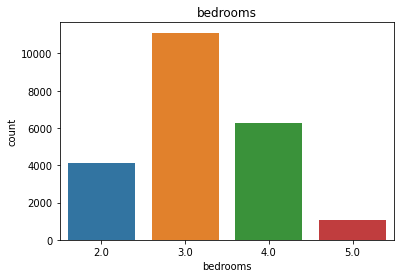

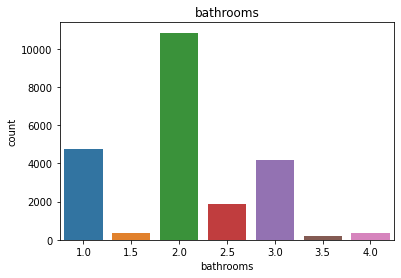

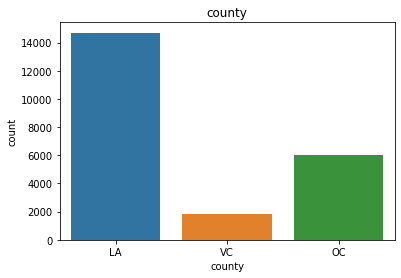

In [9]:
#plot discrete variable distributions
cat_cols = ['bedrooms', 'bathrooms', 'county']

for col in cat_cols:
    sns.countplot(train[col])
    plt.title(col)
    plt.show()

## Continuous w/ continuous
- sns.pairplot(data)
- sns.relplot(x, y, data, kind=scatter)
- sns.lmplot(x, y, data, scatter=True, hue=None, col=None)
- sns.jointplot(x, y, data, kind=scatter)
- sns.heatmap(train.corr())

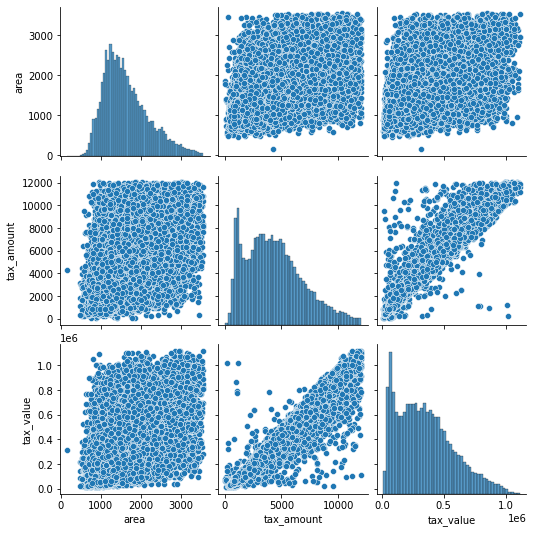

In [10]:
sns.pairplot(train[num_cols])

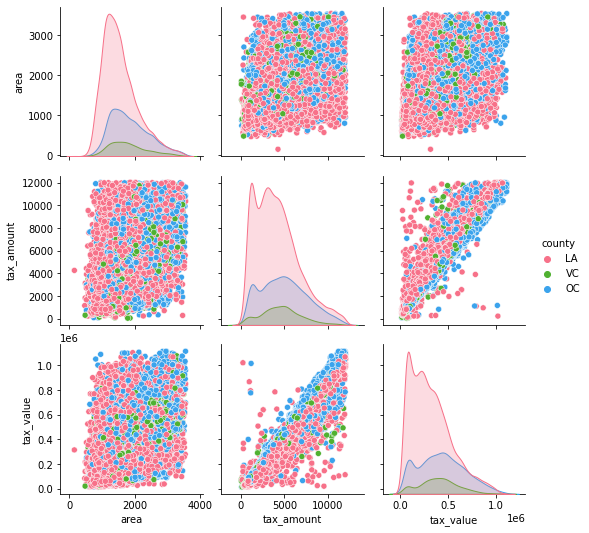

In [11]:
# with subset data, add the categorical column into df
sns.pairplot(train[['area', 'tax_amount', 'tax_value', 'county']] , hue = 'county', palette = 'husl')

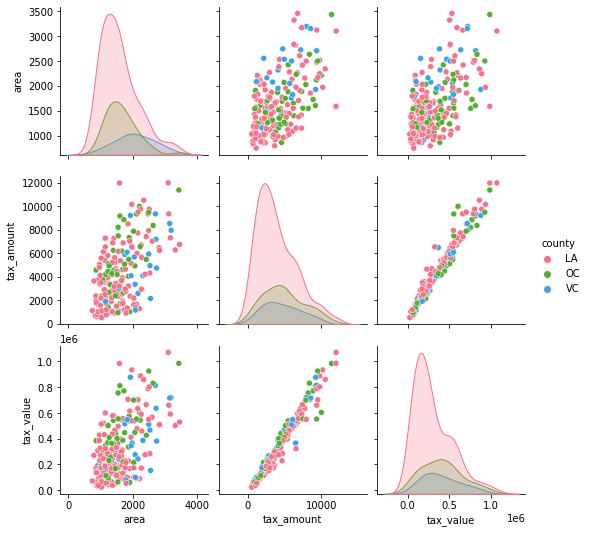

In [12]:
# with subset data, add the categorical column into df, sample used for better visualizations
sns.pairplot(train[['area', 'tax_amount', 'tax_value', 'county']].sample(200) , hue = 'county', palette = 'husl')

## Discrete w/ Continuous
- sns.swarmplot(x='discrete_var', y='continuous_var', data=train)
- sns.stripplot(x='discrete_var', y='continuous_var', data=train)
- sns.boxplot(x='discrete_var', y='continuous_var', data=train)
- sns.violinplot(x='discrete_var', y='continuous_var', data=train)
- sns.barplot(x='discrete_var', y='continuous_var', data=train)

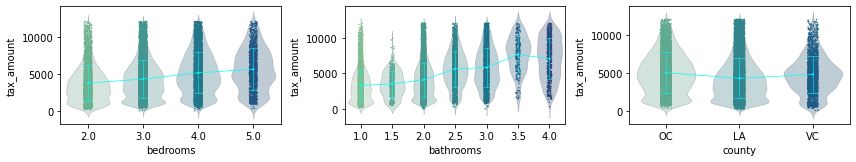

### 3) 

In [13]:
def plot_variable_pairs():
    for col in columns:
        sns.lmplot(x = col, y = 'area', col = 'county',hue = 'county',
                   line_kws =  {'color': 'red'},data = train.sample(1000))
    
    

### 4)

In [14]:
columns = ['bedrooms', 'bathrooms','year_built','area','tax_amount']

def plot_categorical_and_continuous_vars():
    for col in columns:
        sns.set(rc={"figure.figsize":(15, 6)})
        fig, axes = plt.subplots(1,3)
        
        sns.boxplot(x ='county', y = col, data = train.sample(1000),ax = axes[0])
        sns.violinplot(x ='county', y = col, data = train.sample(1000),ax = axes[1]) 
        sns.swarmplot(x ='county', y = col, data = train.sample(1000),ax = axes[2])
    
        plt.show()

In [15]:
train.bedrooms.value_counts()

3.0    11110
4.0     6285
2.0     4103
5.0     1063
Name: bedrooms, dtype: int64

In [3]:
import wrangle3

wrangle3.plot_variable_pairs()

AttributeError: module 'wrangle3' has no attribute 'plot_variable_pairs'

In [4]:
wrangle3.plot_categorical_and_continuous_vars()

AttributeError: module 'wrangle3' has no attribute 'plot_categorical_and_continuous_vars'

### 7) Initial Hypothesis: Area and tax_value are correlated.

Pearson's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between the home area and home value.

𝐻𝑎: There is a linear relationship between home area and home value.


In [6]:
#set alpha
α = 0.5

#perform test
r, p = pearsonr(train.area, train.tax_value)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r}\nP-value: {p}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.415990440840093
P-value: 0.0
Reject the null hypothesis.


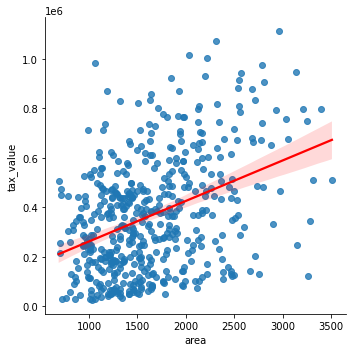

In [16]:
sns.lmplot(data = train.sample(500), 
           x = 'area',
           y = 'tax_value',
           line_kws = {'color': 'red'})

### 11) 
- Bedrooms, bathrooms, year built, and area are all correlated with home price.

In [7]:
#set alpha
α = 0.5

#perform test
r, p = pearsonr(train.bedrooms, train.tax_value)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r}\nP-value: {p}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.18039195324951113
P-value: 2.56891969229362e-164
Reject the null hypothesis.


In [8]:
#set alpha
α = 0.5

#perform test
r, p = pearsonr(train.bathrooms, train.tax_value)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r}\nP-value: {p}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.34978862912886405
P-value: 0.0
Reject the null hypothesis.


In [9]:
#set alpha
α = 0.5

#perform test
r, p = pearsonr(train.year_built, train.tax_value)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r}\nP-value: {p}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.23325136497641513
P-value: 2.076524956631743e-276
Reject the null hypothesis.
